**IMPORTING NECCESSARY LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import plotly.graph_objs as go
import plotly .offline as offline
import plotly.figure_factory as ff

**IMPORTING AND EXAMINING DATASET**

In [2]:
##LOAD THE DATA
df=pd.read_csv('customers.csv')

In [3]:
#view first five rows of the data sets
print(df.head(5))

   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No  

In [4]:
#view last five  rows of the datasets
print(df.tail(5))

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
7027    Male              0     Yes        Yes      24          Yes   
7028  Female              0     Yes        Yes      72          Yes   
7029  Female              0     Yes        Yes      11           No   
7030    Male              1     Yes         No       4          Yes   
7031    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
7027               Yes             DSL            Yes           No   
7028               Yes     Fiber optic             No          Yes   
7029  No phone service             DSL            Yes           No   
7030               Yes     Fiber optic             No           No   
7031                No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7027              Yes         Yes         Yes             Yes        On

In [5]:
##view the shape of dataset
print(df.shape)

(7032, 19)


In [6]:
##get a concise summary of the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [7]:
##compute a summary of statistics pertaining to the DataFrame columns using describe()
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000


In [8]:
# Plotting Correlation Heatmap
corr = df.corr()
figure = ff.create_annotated_heatmap(
    z=corr.values,
    x=list(corr.columns),
    y=list(corr.index),
    annotation_text=corr.round(2).values,
    showscale=True)
offline.plot(figure,filename='corrheatmap.html')

'corrheatmap.html'

**PREPARING DATA**

In [9]:
#Droping highly corrolated variables with causation
#from the heatmap, it is adviceable to drop the variable 'TotalCharges'
#because it corrolated highly with the variables 'tenure', MonthlyCharges' and has causaion.
df=df.drop(['TotalCharges'],axis=1)

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [11]:
# Plotting Correlation Heatmap
corr = df.corr()
figure = ff.create_annotated_heatmap(
    z=corr.values,
    x=list(corr.columns),
    y=list(corr.index),
    annotation_text=corr.round(2).values,
    showscale=True)
offline.plot(figure,filename='corrheatmap1.html')

'corrheatmap1.html'

In [12]:
# Converting Categorical features into Numerical features
categorical_features= ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
df_final = pd.get_dummies(df, columns = categorical_features)
print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 44 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   MonthlyCharges                           7032 non-null   float64
 3   gender_Female                            7032 non-null   uint8  
 4   gender_Male                              7032 non-null   uint8  
 5   Partner_No                               7032 non-null   uint8  
 6   Partner_Yes                              7032 non-null   uint8  
 7   Dependents_No                            7032 non-null   uint8  
 8   Dependents_Yes                           7032 non-null   uint8  
 9   PhoneService_No                          7032 non-null   uint8  
 10  PhoneService_Yes                         7032 no

In [13]:
print(df_final.head(5))

   SeniorCitizen  tenure  MonthlyCharges  gender_Female  gender_Male  \
0              0       1           29.85              1            0   
1              0      34           56.95              0            1   
2              0       2           53.85              0            1   
3              0      45           42.30              0            1   
4              0       2           70.70              1            0   

   Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  PhoneService_No  \
0           0            1              1               0                1   
1           1            0              1               0                0   
2           1            0              1               0                0   
3           1            0              1               0                1   
4           1            0              1               0                0   

   ...  StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0  ...                 

In [14]:
#Dividing data into subset
#PERSONAL DATA
Biodata= df_final [['gender_Female', 'gender_Male', 'SeniorCitizen', 'Partner_No','Partner_Yes', 'Dependents_No', 'Dependents_Yes']]


#CONTRACT DATA
#To provide customer contract information
Contract_Info= df_final [['Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'MonthlyCharges']]



#SECURITY DATA
Security_Info= df_final [['InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes','DeviceProtection_No','DeviceProtection_No internet service', 'DeviceProtection_Yes']]



#STREAMING INFORMATION
#Shows how much customers stream based on technical support, internet service providers and security
Streaming_Info= df_final[['TechSupport_No','TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No','OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes','DeviceProtection_No','DeviceProtection_No internet service', 'DeviceProtection_Yes']]


#SUBSRIPTION INFORMATION
Sub_Info= df_final[['PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']]

#TENURE BASED ON CUSTOMER SATISFACTION
#With the assumption that tenure is based on how satisfied a customer is with a service provider and its charges
#Are customers more satisfied using a certain internet provider?
Tenure_Info= df_final[['tenure', 'MonthlyCharges', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes']]




#TENURE/SECURITY
#Do customers with online security, online backup and device protection pay more?
Sec_ten= df_final[['OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'tenure']]



#Customer loyalty
loyalty= df_final[['PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'tenure']]

In [15]:
# Normalizing numerical features so that each feature has mean 0 and variance 1
feature_scaler = StandardScaler()
X1 = feature_scaler.fit_transform(Biodata)
X2 = feature_scaler.fit_transform(Contract_Info)
X3 = feature_scaler.fit_transform(Security_Info)
X4 = feature_scaler.fit_transform(Streaming_Info)
X5 = feature_scaler.fit_transform(Tenure_Info)
X6 = feature_scaler.fit_transform(Sec_ten)
X7 = feature_scaler.fit_transform(loyalty)
X8 = feature_scaler.fit_transform(Sub_Info)

**DIMENSIONALITY REDUCTION AND CLUSTERING**

In [16]:
#Figure out clusters using Elbow plot
#identfy clusters and create labels using Kmeans
#Analyse Subsets unsing t_sne

**SUBSET 1**

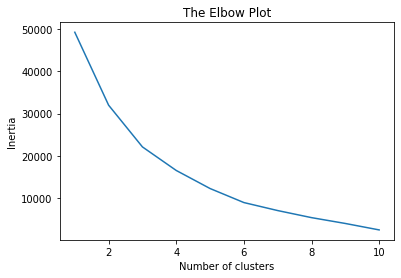

In [17]:
#BIODATA
# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X1)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [18]:
#K-means
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
tsne = TSNE(n_components = 2, perplexity =50,n_iter=2000)
x_tsne = tsne.fit_transform(X1)

gender = list(df['gender'])
sencit = list(df['SeniorCitizen'])
partner = list(df['Partner'])
dep = list(df['Dependents'])


data = [go.Scatter(x=x_tsne[:,0], y=x_tsne[:,1], mode='markers',
                     marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                         text=[f'gender: {a}; sencit: {b}; partner: {c}, dep: {d}' for a,b,c,d in list (zip (gender,sencit,partner,dep))],
                          hoverinfo='text')]



layout = go.Layout(title = 'Biodata', width = 1000, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='Biodata.html')

'Biodata.html'

**SUBSET 2**

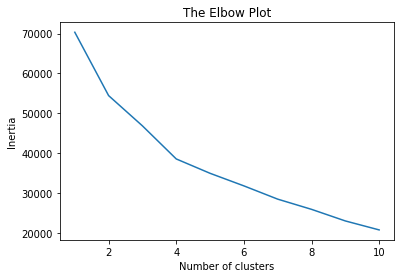

In [20]:
#Contract_Info
# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X2)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [21]:
#K-means
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
tsne = TSNE(n_components = 2, perplexity =50,n_iter=2000)
x_tsne = tsne.fit_transform(X2)

Cont = list(df['Contract'])
Billing = list(df['PaperlessBilling'])
paymetd = list(df['PaymentMethod'])
monchrg = list(df['MonthlyCharges'])


data = [go.Scatter(x=x_tsne[:,0], y=x_tsne[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                   text = [f'Cont:{a}; Billing:{b}; paymetd:{c}; monchrg:{d}' for a,b,c,d in list (zip(Cont,Billing,paymetd,monchrg))],
                    hoverinfo='text')]

layout = go.Layout(title = 'Contract_Info', width = 1000, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='Contract_Info.html')

'Contract_Info.html'

**SUBSET 3**

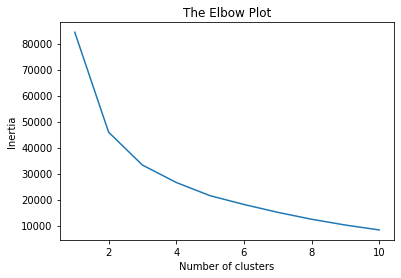

In [23]:
#Security_Info
# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X3)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [24]:
#K-means
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [25]:
tsne = TSNE(n_components = 2, perplexity =30,n_iter=2000)
x_tsne = tsne.fit_transform(X3)

intServ = list(df['InternetService'])
OnSec = list(df['OnlineSecurity'])
onBU = list(df['OnlineBackup'])
devPro = list(df['DeviceProtection'])

data = [go.Scatter(x=x_tsne[:,0], y=x_tsne[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                   text = [f'intServ:{a}; OnSec:{b}; onBU:{c}; devPro:{d}' for a,b,c,d in list (zip(intServ,OnSec,onBU,devPro))],
                    hoverinfo='text')]

layout = go.Layout(title = 'Security_Info', width = 1000, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='Security_Info.html')

'Security_Info.html'

**SUBSET 4**

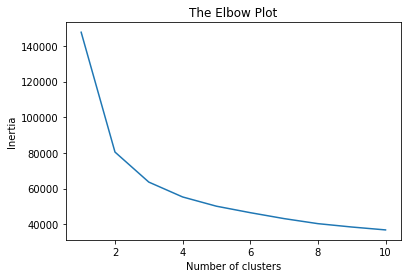

In [26]:
#Streaming_Inf
# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X4)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [27]:
#K-means
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [28]:
tsne = TSNE(n_components = 2, perplexity =30,n_iter=2000)
x_tsne = tsne.fit_transform(X4)

techSup = list(df['TechSupport'])
TV = list(df['StreamingTV'])
movies = list(df['StreamingMovies'])
OnSec = list(df['OnlineSecurity'])
onBU = list(df['OnlineBackup'])
devPro = list(df['DeviceProtection'])
intServ = list(df['InternetService'])


data = [go.Scatter(x=x_tsne[:,0], y=x_tsne[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                   text = [f'TV:{a}; movies:{b}; intServ:{c}; techSup:{d}, OnSec:{e}, onBU:{f}, devPro:{g}' for a,b,c,d,e,f,g in list (zip(TV,movies,intServ,techSup,OnSec,onBU,devPro))],
                    hoverinfo='text')]

layout = go.Layout(title = 'Streaming_Info', width = 1000, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='Streaming_Info.html')

'Streaming_Info.html'

**SUBSET 5**

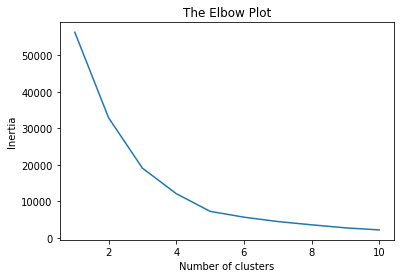

In [29]:
#Tenure_Info
# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X5)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [30]:
#K-means
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X5)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [31]:
tsne = TSNE(n_components = 2, perplexity =30,n_iter=2000)
x_tsne = tsne.fit_transform(X5)

monchrg = list(df['MonthlyCharges'])
intServ = list(df['InternetService'])
OnSec = list(df['OnlineSecurity'])
ten = list(df['tenure'])


data = [go.Scatter(x=x_tsne[:,0], y=x_tsne[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                   text = [f' ten:{a}; OnSec:{b}; intServ:{c}; monchrg:{d}' for a,b,c,d in list (zip(ten,OnSec,intServ,monchrg))],
                    hoverinfo='text')]

layout = go.Layout(title = 'Tenure_Info', width = 1000, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='Tenure_Info.html')

'Tenure_Info.html'

**SUBSET 6**

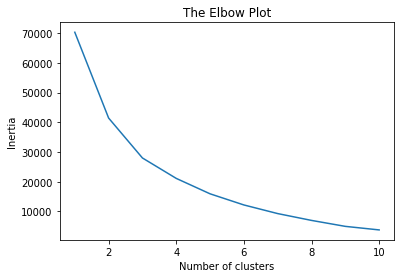

In [32]:
#Sec_charges
# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X6)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [33]:
#K-means
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X6)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [34]:
tsne = TSNE(n_components = 2, perplexity =50,n_iter=2000)
x_tsne = tsne.fit_transform(X6)


OnSec = list(df['OnlineSecurity'])
onBU = list(df['OnlineBackup'])
devPro = list(df['DeviceProtection'])
ten = list(df['tenure'])



data = [go.Scatter(x=x_tsne[:,0], y=x_tsne[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                   text = [f'OnSec:{a}; onBU:{b}; devPro:{c}; ten:{d}' for a,b,c,d in list (zip(OnSec,onBU,devPro,ten))],
                    hoverinfo='text')]

layout = go.Layout(title = 'Sec_ten', width = 1000, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='Sec_ten.html')

'Sec_ten.html'

**SUBSET 7**

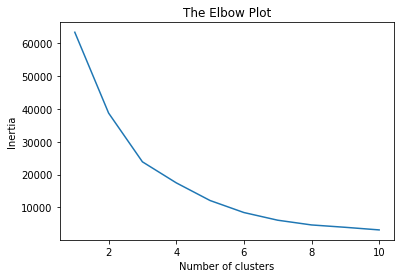

In [35]:
#Sec_charges
# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X7)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [36]:
#K-means
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X7)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [37]:
tsne = TSNE(n_components = 2, perplexity =50,n_iter=2000)
x_tsne = tsne.fit_transform(X7)


ten = list(df['tenure'])
phoneS = list(df['PhoneService'])
Mlines = list(df['MultipleLines'])
intServ = list(df['InternetService'])



data = [go.Scatter(x=x_tsne[:,0], y=x_tsne[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                   text = [f'ten:{a}; phoneS:{b}; Mlines:{c}; intServ:{d}' for a,b,c,d in list (zip(ten,phoneS,Mlines,intServ))],
                    hoverinfo='text')]

layout = go.Layout(title = 'loyalty', width = 1000, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='loyalty.html')

'loyalty.html'

**SUBSET 8**

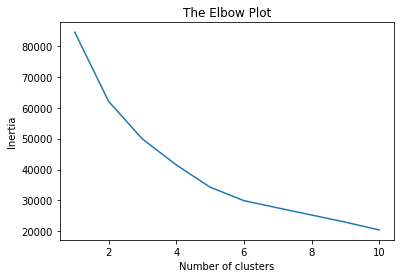

In [38]:
#Sec_charges
# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X8)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [39]:
#K-means
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X8)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [40]:
tsne = TSNE(n_components = 2, perplexity =30,n_iter=2000)
x_tsne = tsne.fit_transform(X8)


phoneS = list(df['PhoneService'])
Mlines = list(df['MultipleLines'])
Cont = list(df['Contract'])
paymetd = list(df['PaymentMethod'])




data = [go.Scatter(x=x_tsne[:,0], y=x_tsne[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                   text = [f'phoneS:{a}; Mlines:{b}; Cont:{c}; paymetd:{d}' for a,b,c,d in list (zip(phoneS,Mlines,Cont,paymetd))],
                    hoverinfo='text')]

layout = go.Layout(title = 'Sub_Info', width = 1000, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='Sub_Info.html')

'Sub_Info.html'